<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-AngeHdz/blob/main/Actividad_Semanal_6%2C_visualizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Semana 6 - Actividad 
Nombre de Alumno: Angel De Jesus Hernandez Pascual

N. matrícula: A01794256

Profesor: María de la Paz Rico Fernández

Fecha: 11/01/2022

In [577]:
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import scipy.sparse

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA


1.- Descarga los datos, y carga el dataset en tu libreta

In [578]:
df = pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv', index_col='ID')
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


2.- Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

In [579]:
df.shape

(30000, 24)

In [580]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')

In [581]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [582]:
df.dtypes

X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

In [583]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      30000 non-null  int64  
 1   X2      29999 non-null  float64
 2   X3      29998 non-null  float64
 3   X4      29998 non-null  float64
 4   X5      29995 non-null  float64
 5   X6      29997 non-null  float64
 6   X7      29995 non-null  float64
 7   X8      29993 non-null  float64
 8   X9      29991 non-null  float64
 9   X10     29984 non-null  float64
 10  X11     29986 non-null  float64
 11  X12     29989 non-null  float64
 12  X13     29989 non-null  float64
 13  X14     29987 non-null  float64
 14  X15     29985 non-null  float64
 15  X16     29983 non-null  float64
 16  X17     29990 non-null  float64
 17  X18     29992 non-null  float64
 18  X19     29991 non-null  float64
 19  X20     29992 non-null  float64
 20  X21     29989 non-null  float64
 21  X22     29989 non-null  float64
 22

In [584]:
df.isna().sum()

X1      0
X2      1
X3      2
X4      2
X5      5
X6      3
X7      5
X8      7
X9      9
X10    16
X11    14
X12    11
X13    11
X14    13
X15    15
X16    17
X17    10
X18     8
X19     9
X20     8
X21    11
X22    11
X23     5
Y       3
dtype: int64

2.- Limpia los datos eliminando los registros nulos o rellena con la media de la columna

In [585]:
df[df['X16'].isna()]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
19,360000,2.0,1.0,1.0,49.0,1.0,-2.0,-2.0,-2.0,-2.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176,130000,1.0,3.0,1.0,56.0,1.0,2.0,2.0,2.0,2.0,...,68557.0,NaN,71345.0,3000.0,3000.0,3000.0,5500.0,0.0,0.0,1.0
241,60000,2.0,1.0,2.0,28.0,1.0,2.0,2.0,-2.0,-2.0,...,0.0,NaN,2285.0,0.0,0.0,0.0,0.0,2285.0,0.0,0.0
6228,30000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,21120.0,1586.0,1365.0,1663.0,5106.0,1050.0,0.0,0.0
6233,60000,2.0,2.0,2.0,29.0,2.0,2.0,2.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6277,30000,1.0,3.0,1.0,32.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,1400.0,3000.0,1431.0,483.0,0.0,700.0,0.0,0.0
6278,110000,2.0,1.0,2.0,32.0,1.0,2.0,0.0,0.0,0.0,...,NaN,NaN,25453.0,1210.0,2056.0,1200.0,2300.0,0.0,1000.0,1.0
6279,20000,2.0,3.0,2.0,54.0,0.0,0.0,2.0,2.0,2.0,...,NaN,NaN,9116.0,2000.0,1000.0,1000.0,0.0,500.0,500.0,0.0
24124,50000,1.0,1.0,2.0,29.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.0,0.0


In [586]:
#Se eliminan los rows que en la columna X16 contienen datos perdidos
df.dropna(subset=["X16"], inplace= True)

In [587]:
df.isna().sum()

X1     0
X2     0
X3     0
X4     0
X5     3
X6     0
X7     0
X8     2
X9     4
X10    8
X11    6
X12    0
X13    0
X14    1
X15    0
X16    0
X17    1
X18    0
X19    1
X20    0
X21    3
X22    3
X23    2
Y      0
dtype: int64

In [588]:
df[df['X10'].isna()]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
50,20000,1.0,1.0,2.0,24.0,0.0,0.0,0.0,0.0,NaN,...,19865.0,20480.0,20063.0,1318.0,1315.0,704.0,928.0,912.0,1069.0,0.0
234,190000,1.0,2.0,2.0,34.0,2.0,0.0,0.0,0.0,NaN,...,142323.0,140120.0,150052.0,5000.0,5000.0,10000.0,0.0,12118.0,2769.0,1.0
6269,120000,1.0,2.0,2.0,29.0,1.0,2.0,0.0,0.0,NaN,...,91380.0,93263.0,95079.0,0.0,3200.0,6800.0,3500.0,3500.0,0.0,1.0
6270,400000,2.0,1.0,2.0,27.0,1.0,-2.0,-1.0,0.0,NaN,...,12640.0,14805.0,238.0,140.0,12527.0,253.0,2305.0,238.0,238.0,0.0
6271,50000,2.0,1.0,1.0,55.0,0.0,0.0,0.0,0.0,NaN,...,19431.0,19837.0,20232.0,1775.0,1815.0,695.0,719.0,724.0,750.0,0.0
6383,80000,2.0,2.0,1.0,30.0,1.0,2.0,0.0,0.0,NaN,...,75374.0,77158.0,78710.0,0.0,3299.0,2699.0,3000.0,2987.0,3100.0,0.0
6384,90000,1.0,2.0,2.0,29.0,0.0,0.0,0.0,0.0,NaN,...,69362.0,70537.0,56775.0,4400.0,4111.0,2100.0,2200.0,2510.0,2000.0,0.0
6385,20000,2.0,2.0,2.0,22.0,0.0,0.0,0.0,0.0,NaN,...,20055.0,19606.0,19925.0,1298.0,1909.0,1666.0,5000.0,703.0,775.0,0.0


In [589]:
df[df['X11'].isna()]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
6269,120000,1.0,2.0,2.0,29.0,1.0,2.0,0.0,0.0,NaN,...,91380.0,93263.0,95079.0,0.0,3200.0,6800.0,3500.0,3500.0,0.0,1.0
6270,400000,2.0,1.0,2.0,27.0,1.0,-2.0,-1.0,0.0,NaN,...,12640.0,14805.0,238.0,140.0,12527.0,253.0,2305.0,238.0,238.0,0.0
6271,50000,2.0,1.0,1.0,55.0,0.0,0.0,0.0,0.0,NaN,...,19431.0,19837.0,20232.0,1775.0,1815.0,695.0,719.0,724.0,750.0,0.0
6383,80000,2.0,2.0,1.0,30.0,1.0,2.0,0.0,0.0,NaN,...,75374.0,77158.0,78710.0,0.0,3299.0,2699.0,3000.0,2987.0,3100.0,0.0
6384,90000,1.0,2.0,2.0,29.0,0.0,0.0,0.0,0.0,NaN,...,69362.0,70537.0,56775.0,4400.0,4111.0,2100.0,2200.0,2510.0,2000.0,0.0
6385,20000,2.0,2.0,2.0,22.0,0.0,0.0,0.0,0.0,NaN,...,20055.0,19606.0,19925.0,1298.0,1909.0,1666.0,5000.0,703.0,775.0,0.0


In [590]:
#Se eliminan los rows que en la columna X11 contienen datos perdidos
df.dropna(subset=["X11"], inplace= True)

In [591]:
df.isna().sum()

X1     0
X2     0
X3     0
X4     0
X5     3
X6     0
X7     0
X8     2
X9     4
X10    2
X11    0
X12    0
X13    0
X14    1
X15    0
X16    0
X17    1
X18    0
X19    1
X20    0
X21    3
X22    3
X23    2
Y      0
dtype: int64

In [592]:
df[df['X5'].isna()]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
183,500000,2.0,1.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,...,122967.0,108834.0,70064.0,70010.0,30357.0,30000.0,20000.0,52183.0,20000.0,0.0
220,310000,2.0,1.0,2.0,NaN,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,4542.0,126.0,0.0,0.0,0.0,0.0,0.0
240,140000,2.0,2.0,3.0,NaN,0.0,0.0,0.0,0.0,0.0,...,19068.0,16409.0,16383.0,3000.0,2000.0,2198.0,1000.0,3000.0,2399.0,1.0


In [593]:
for columnName in df.columns:
  df[columnName].fillna(df[columnName].mean(), inplace= True)

In [594]:
df.isna().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

In [595]:
df.loc[df['X4'].isin([0])]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
219,110000,2.0,3.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0,...,73315.0,63818.0,63208.0,4000.0,5000.0,3000.0,3000.0,3000.0,8954.0,0.0
810,160000,2.0,2.0,0.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28574.0,27268.0,28021.0,35888.0,1325.0,891.0,1000.0,1098.0,426.0,0.0
821,200000,2.0,3.0,0.0,51.0,-1.0,-1.0,-1.0,-1.0,0.0,...,780.0,390.0,390.0,0.0,390.0,780.0,0.0,390.0,390.0,0.0
1020,180000,2.0,3.0,0.0,45.0,-1.0,-1.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1444,200000,1.0,3.0,0.0,51.0,-1.0,-1.0,-1.0,-1.0,0.0,...,2529.0,1036.0,4430.0,5020.0,9236.0,2529.0,0.0,4430.0,6398.0,0.0
2147,150000,2.0,3.0,0.0,55.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,2939.0,3396.0,1870.0,17498.0,9160.0,2939.0,3396.0,1870.0,6800.0,0.0
2555,220000,2.0,1.0,0.0,33.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,608.0,1738.0,277.0,1531.0,942.0,608.0,1738.0,277.0,492.0,0.0
3057,200000,1.0,3.0,0.0,36.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,41359.0,9140.0,0.0,89187.0,14178.0,41359.0,9140.0,0.0,0.0,0.0
4471,70000,1.0,3.0,0.0,35.0,2.0,2.0,2.0,2.0,2.0,...,50517.0,51658.0,52758.0,2200.0,1900.0,2000.0,2100.0,2100.0,2000.0,0.0


In [596]:
df['X4'] = df['X4'].replace(0,3)

In [597]:
#X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)
df.loc[df['X3'].isin([0,5,6])]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
48,150000,2.0,5.0,2.0,46.0,0.0,0.0,-1.0,0.0,0.0,...,1170.0,0.0,0.0,1013.0,1170.0,0.0,0.0,0.0,0.0,1.0
70,20000,1.0,5.0,2.0,22.0,2.0,0.0,0.0,0.0,0.0,...,18085.0,11205.0,5982.0,0.0,1200.0,1000.0,500.0,1000.0,0.0,0.0
386,410000,2.0,5.0,1.0,42.0,0.0,0.0,0.0,0.0,0.0,...,240865.0,234939.0,240176.0,15000.0,14000.0,9000.0,8500.0,9000.0,8300.0,0.0
503,230000,2.0,6.0,2.0,46.0,0.0,0.0,0.0,0.0,0.0,...,186635.0,189896.0,193351.0,10000.0,9000.0,8000.0,8000.0,7500.0,7000.0,0.0
505,30000,1.0,6.0,1.0,53.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29812,50000,1.0,5.0,2.0,46.0,0.0,0.0,0.0,-1.0,0.0,...,19183.0,19563.0,19157.0,1423.0,1000.0,19183.0,687.0,696.0,776.0,0.0
29837,180000,1.0,6.0,1.0,34.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29840,150000,1.0,5.0,1.0,36.0,0.0,0.0,0.0,0.0,0.0,...,136378.0,139219.0,142172.0,5500.0,3800.0,3900.0,4000.0,4100.0,4100.0,0.0


In [598]:
df['X3'] = df['X3'].replace(0,4)
df['X3'] = df['X3'].replace(5,4)
df['X3'] = df['X3'].replace(6,4)

4.- Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

In [599]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,29977.000000,29977.000000,29977.000000,29977.000000,29977.000000,29977.000000,29977.000000,29977.000000,29977.000000,29977.000000,...,29977.000000,29977.000000,29977.000000,29977.000000,2.997700e+04,29977.000000,29977.000000,29977.000000,29977.000000,29977.000000
mean,167522.089602,1.603896,1.842179,1.557327,35.483185,-0.016946,-0.134003,-0.166772,-0.220932,-0.266489,...,43275.298929,40322.717317,38884.587337,5665.109751,5.924135e+03,5227.296594,4828.637219,4801.538200,5219.092544,0.221136
std,129738.211165,0.489095,0.744483,0.521417,9.216669,1.123828,1.197012,1.195905,1.169099,1.133109,...,64351.861075,60814.267930,59570.533837,16568.001107,2.304935e+04,17612.605299,15671.706313,15283.450395,17783.810246,0.415019
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2327.000000,1763.000000,1256.000000,1000.000000,8.350000e+02,390.000000,297.000000,253.000000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19050.000000,18105.000000,17074.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54531.000000,50207.000000,49206.000000,5006.000000,5.000000e+03,4507.000000,4015.000000,4040.000000,4000.000000,0.000000
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


5.- Realiza el conteo de las variables categóricas

Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 

X2: Gender (1 = male; 2 = female). 

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)

X4: Marital status (1 = married; 2 = single; 3 = others). 

X5: Age (year). 

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 

X6 = the repayment status in September, 2005; 

X7 = the repayment status in August, 2005; . . .;

X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 

X12-X17: Amount of bill statement (NT dollar). 

X12 = amount of bill statement in September, 2005; 

X13 = amount of bill statement in August, 2005; . . .; 

X17 = amount of bill statement in April, 2005. 

X18-X23: Amount of previous payment (NT dollar). 

X18 = amount paid in September, 2005; 

X19 = amount paid in August, 2005; . . .;

X23 = amount paid in April, 2005. 

In [708]:
categorical_features= ['X2','X3','X4','X6','X7','X8','X9','X10','X11']
numeric_features = ['X1','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23']

6.- Escala los datos, si consideras necesario

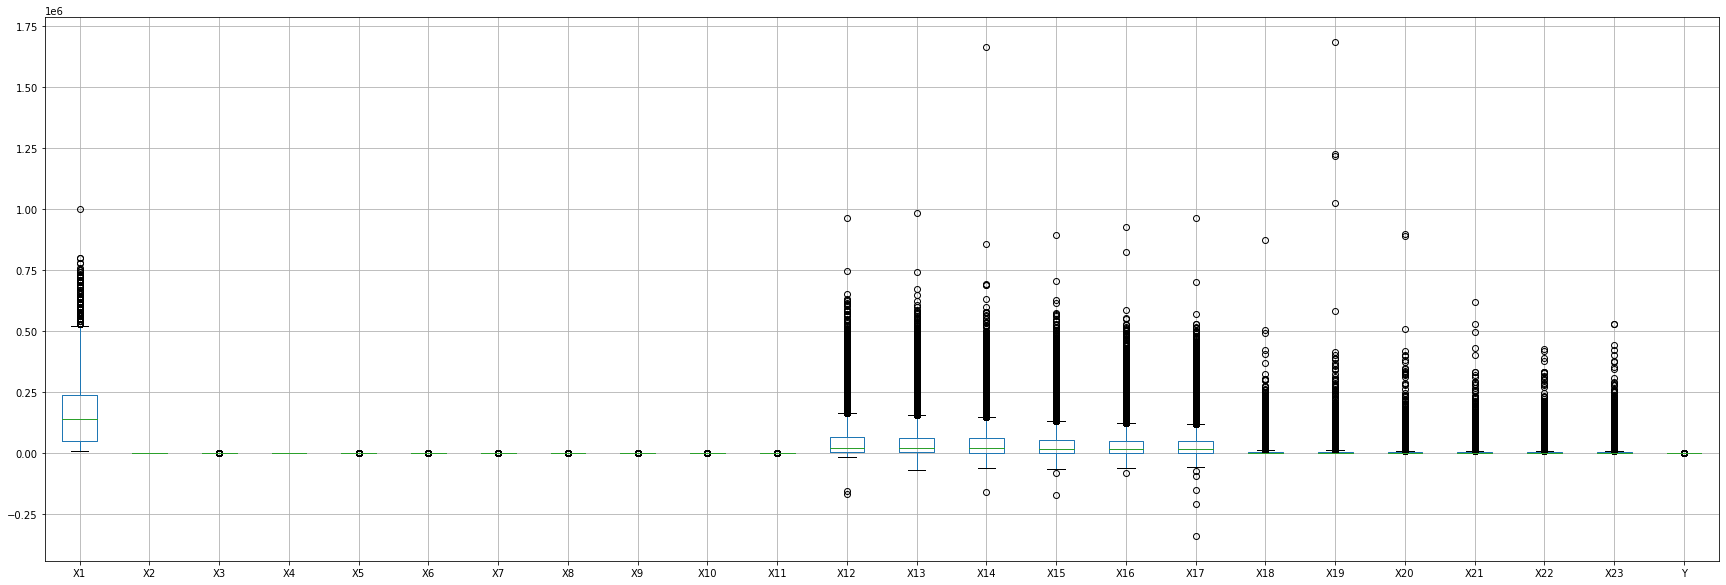

In [709]:
df.boxplot(figsize=(30,10))

In [710]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder,PowerTransformer,MinMaxScaler
from sklearn.compose import make_column_transformer

In [711]:
ss = StandardScaler()

In [712]:
df0 = df.copy()
df0[numeric_features] = ss.fit_transform(df[numeric_features])

In [713]:
df0.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,2.997700e+04,29977.000000,29977.000000,29977.000000,29977.000000,29977.000000,29977.000000,29977.000000,29977.000000,29977.000000,...,2.997700e+04,2.997700e+04,2.997700e+04,2.997700e+04,2.997700e+04,2.997700e+04,2.997700e+04,2.997700e+04,2.997700e+04,29977.000000
mean,-5.688703e-18,1.603896,1.842179,1.557327,35.483185,-0.016946,-0.134003,-0.166772,-0.220932,-0.266489,...,3.033975e-17,6.162762e-18,4.977615e-17,1.422176e-17,3.081381e-17,1.516988e-17,-2.607322e-17,2.109561e-17,3.638400e-17,0.221136
std,1.000017e+00,0.489095,0.744483,0.521417,9.216669,1.123828,1.197012,1.195905,1.169099,1.133109,...,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,0.415019
min,-1.214174e+00,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-3.314261e+00,-2.000497e+00,-6.353710e+00,-3.419365e-01,-2.570239e-01,-2.967979e-01,-3.081169e-01,-3.141711e-01,-2.934793e-01,0.000000
25%,-9.058553e-01,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-6.363294e-01,-6.340677e-01,-6.316750e-01,-2.815782e-01,-2.207967e-01,-2.746543e-01,-2.891652e-01,-2.976170e-01,-2.868439e-01,0.000000
50%,-2.121391e-01,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.764569e-01,-3.653433e-01,-3.661366e-01,-2.151840e-01,-1.698616e-01,-1.945966e-01,-2.124014e-01,-2.160241e-01,-2.091315e-01,0.000000
75%,5.586567e-01,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.749116e-01,1.625350e-01,1.732666e-01,-3.978276e-02,-4.009443e-02,-4.089733e-02,-5.191846e-02,-4.982847e-02,-6.855184e-02,0.000000
max,6.416705e+00,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.318260e+01,1.458314e+01,1.549079e+01,5.238419e+01,7.281606e+01,5.057898e+01,3.931810e+01,2.759419e+01,2.943439e+01,1.000000


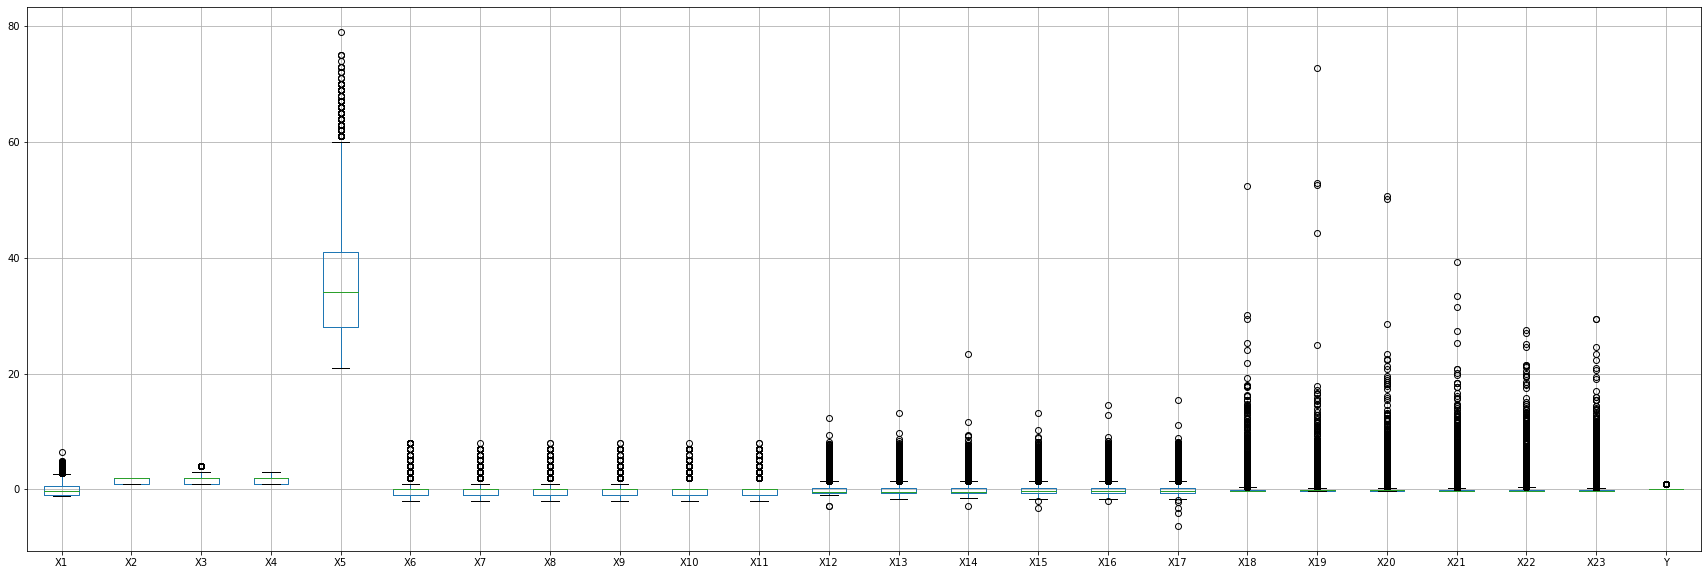

In [714]:
df0.boxplot(figsize=(30,10))

In [715]:
df0[ df0['X19'] > 30 ].index

Int64Index([5297, 25732, 28004, 28717], dtype='int64', name='ID')

In [716]:
df0 =df0.drop(df0[ df0['X18'] > 15 ].index)
df0 =df0.drop(df0[ df0['X19'] > 15 ].index)
df0 =df0.drop(df0[ df0['X20'] > 15 ].index)
df0 =df0.drop(df0[ df0['X21'] > 15 ].index)
df0 =df0.drop(df0[ df0['X22'] > 15 ].index)
df0 =df0.drop(df0[ df0['X23'] > 15 ].index)

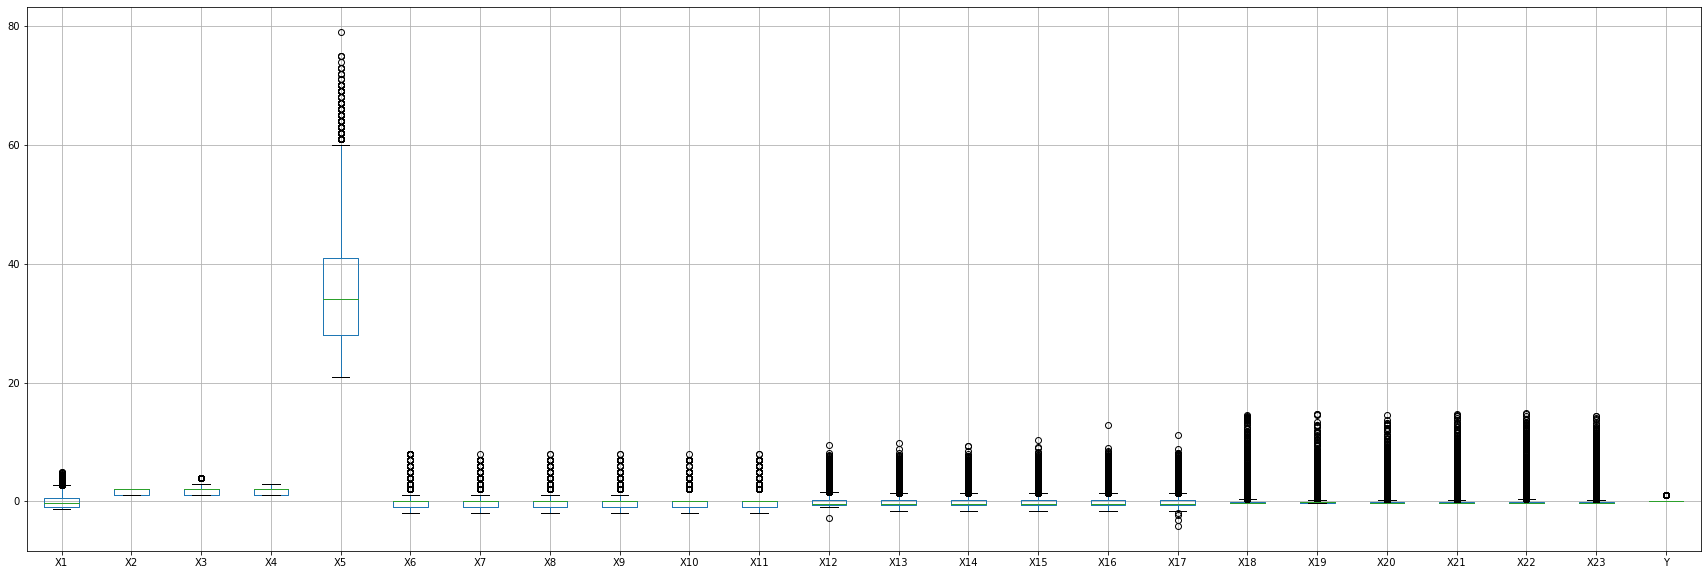

In [717]:
df0.boxplot(figsize=(30,10))

In [718]:
pca = PCA(n_components=2, random_state=42)

In [719]:
pca.fit(df0[categorical_features])

PCA(n_components=2, random_state=42)

In [720]:
pca_1 = pca.fit_transform(df0[categorical_features])

In [721]:
pca_1[:4]

array([[-0.52108109, -3.72008084],
       [ 1.75538669,  0.84426831],
       [ 0.45850447,  0.20254433],
       [ 0.45115521,  0.18635963]])

In [722]:
print(df.shape)
print(pca_1.shape)

(29977, 24)
(29883, 2)


In [723]:
df_2 = pd.DataFrame({'PCA1':pca_1[:,0],'PCA2':pca_1[:,1],'clase':df0['Y']})

In [724]:
df_2

,PCA1,PCA2,clase
ID,,,
1,-0.521081,-3.720081,1.0
2,1.755387,0.844268,1.0
3,0.458504,0.202544,0.0
4,0.451155,0.186360,0.0
5,-0.308453,0.898101,0.0
...,...,...,...
29996,0.510711,0.094369,0.0
29997,-1.111596,1.042876,0.0
29998,3.525119,-4.026505,1.0


In [725]:
pca.explained_variance_ratio_

array([0.63684628, 0.10056702])

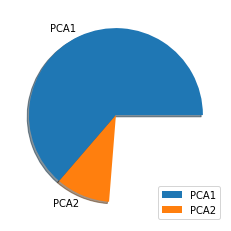

In [726]:
plt.pie(pca.explained_variance_ratio_, labels=['PCA1','PCA2'], shadow=True)
plt.legend()
plt.show() 

In [727]:
pca.explained_variance_ratio_.sum()

0.7374132920621679

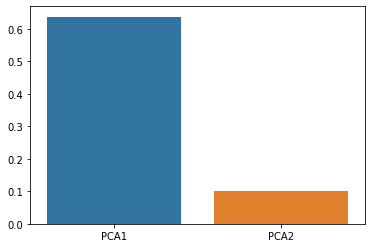

In [728]:
sns.barplot(x=['PCA1','PCA2'] , y = pca.explained_variance_ratio_)

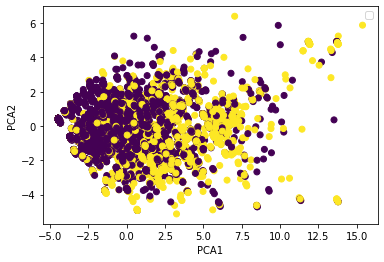

In [729]:
fig, ax = plt.subplots()
ax.scatter(pca_1[:,0], pca_1[:,1], c=df0['Y'])
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')

ax.legend()
plt.show()

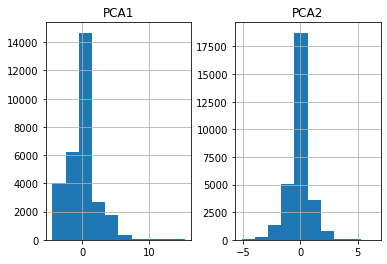

In [730]:
hist = df_2[['PCA1','PCA2']].hist()

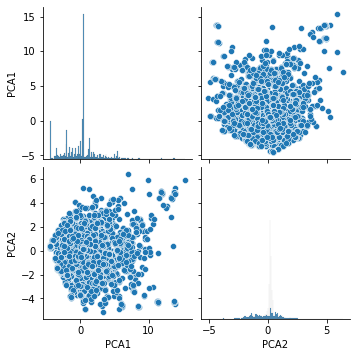

In [731]:
sns.pairplot(df_2[['PCA1','PCA2']])

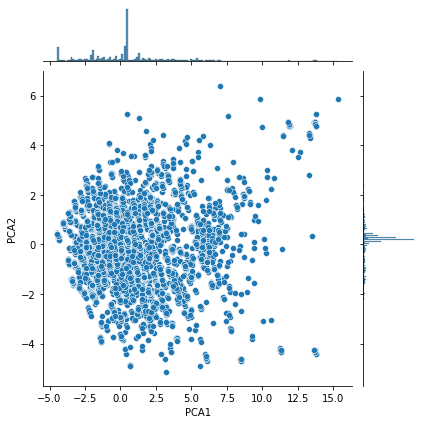

In [732]:
sns.jointplot(data=df_2, x="PCA1", y="PCA2")

In [747]:
pca3 = PCA(n_components=2, random_state=42)

In [748]:
pca3.fit(df0)

PCA(n_components=2, random_state=42)

In [749]:
pca_3 = pca3.fit_transform(df0)

In [750]:
pca_3[:4]

array([[-11.48650035,  -1.4869928 ],
       [ -9.53649999,   0.3187776 ],
       [ -1.51721648,  -0.34512639],
       [  1.50987166,   0.17279949]])

In [751]:
df_3 = pd.DataFrame({'PCA1':pca_3[:,0],'PCA2':pca_3[:,1],'clase':df0['Y']})

In [752]:
df_3

,PCA1,PCA2,clase
ID,,,
1,-11.486500,-1.486993,1.0
2,-9.536500,0.318778,1.0
3,-1.517216,-0.345126,0.0
4,1.509872,0.172799,0.0
5,21.506430,-0.740544,0.0
...,...,...,...
29996,3.595174,2.083299,0.0
29997,7.522198,-1.822545,0.0
29998,1.429704,1.926204,1.0


In [754]:
pca3.explained_variance_ratio_

array([0.81112408, 0.06878401])

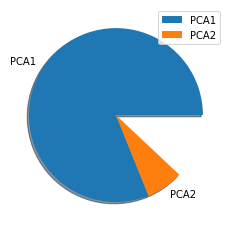

In [762]:
plt.pie(pca3.explained_variance_ratio_, labels=['PCA1','PCA2'], shadow=True)
plt.legend()
plt.show() 

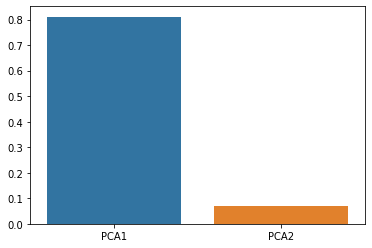

In [755]:
sns.barplot(x=['PCA1','PCA2'] , y = pca3.explained_variance_ratio_)

In [763]:
pca3.explained_variance_ratio_.sum()

0.8799080886391026

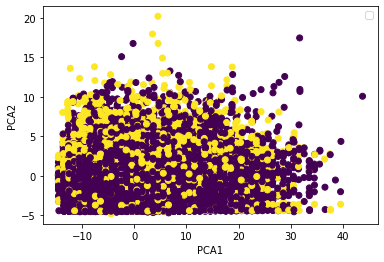

In [757]:
fig, ax = plt.subplots()
ax.scatter(pca_3[:,0], pca_3[:,1], c=df0['Y'])
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.legend()
plt.show()

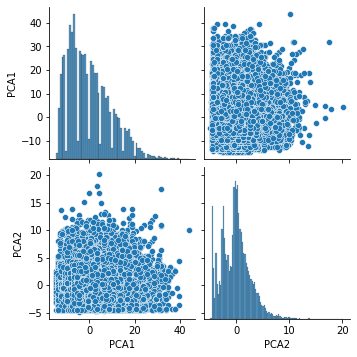

In [758]:
sns.pairplot(df_3[['PCA1','PCA2']])

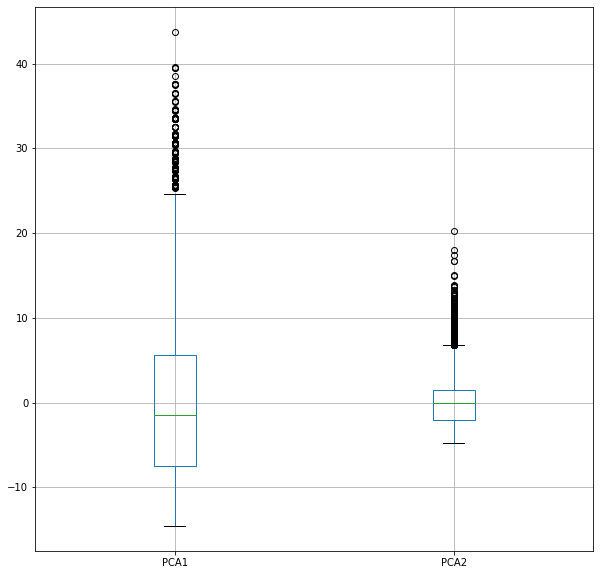

In [759]:
df_3[['PCA1','PCA2']].boxplot(figsize=(10,10))

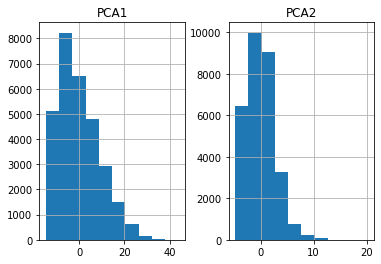

In [761]:
hist = df_3[['PCA1','PCA2']].hist()

# Concluciones

Se realizaron varias pruebas pero se concluyo que las variables que estan descritas como numericas en montos de pagos, deben ser escaladas por que se trata de coantidades grandes y las categoricas no se transformaron.

La variable edad cuando es escalada produce una baja varianza a diferencia de cuando se deja con sus valores normales, dando como resultado una PCA1 de aproximadamente .81


La maxima varianza obtenida con los numericos procesados con la funcion standarscaler para numericos , los categoricos sin propocesar y la edad sin procesar fue de .87 con dos PCA

In [764]:
pca3.explained_variance_ratio_.sum()

0.8799080886391026